# 주문지역 별 집계

In [92]:
import pandas as pd
import numpy as np
import json

# df = pd.read_csv('./datas/klm1144__dataframe.csv')
t_df = pd.read_csv('2020-9/klm1144.csv')
c_df = pd.read_csv('2020-11/klm1144.csv')

t_order = t_df.groupby('address').sum('payment')
c_order = c_df.groupby('address').sum('payment')
t_order


,Unnamed: 0,campaign_id,payment
address,,,
경기 수원시 권선구 서둔동 ****,109,3046829,12000
경기 수원시 권선구 세류2동 ****,35,3046829,10000
경기 수원시 권선구 평동 ****,9623,314247400,2206000
경기 화성시 매송면 매송면 ****,4658,135233820,934000
경기 화성시 봉담읍 봉담읍 ****,1528,63109137,480000
경기도 수원시 권선구 평동 ****,233,6052026,32000


In [94]:
t_order['profit'] = t_order.payment - c_order.payment
t_order

,Unnamed: 0,campaign_id,payment,profit
address,,,,
경기 수원시 권선구 서둔동 ****,109,3046829,12000,-227000.0
경기 수원시 권선구 세류2동 ****,35,3046829,10000,NaN
경기 수원시 권선구 평동 ****,9623,314247400,2206000,-1115000.0
경기 화성시 매송면 매송면 ****,4658,135233820,934000,286000.0
경기 화성시 봉담읍 봉담읍 ****,1528,63109137,480000,-701000.0
경기도 수원시 권선구 평동 ****,233,6052026,32000,16000.0


In [95]:
t_order = t_order.loc[:, ~t_order.columns.str.contains('^Unnamed')]
t_order

,campaign_id,payment,profit
address,,,
경기 수원시 권선구 서둔동 ****,3046829,12000,-227000.0
경기 수원시 권선구 세류2동 ****,3046829,10000,NaN
경기 수원시 권선구 평동 ****,314247400,2206000,-1115000.0
경기 화성시 매송면 매송면 ****,135233820,934000,286000.0
경기 화성시 봉담읍 봉담읍 ****,63109137,480000,-701000.0
경기도 수원시 권선구 평동 ****,6052026,32000,16000.0


In [109]:
for address in t_order[t_order.profit.isna()].index.to_list():
    if address in t_order.index:
        t_order.loc[address] = t_order.loc[address].payment
    elif address in c_order.index:
        t_order.loc[address] = -c_order.loc[address].payment
    else:
        raise ValueError('뭔가 잘못 되었다.')
# t_order.profit.plot().bar()

,campaign_id,payment,profit
address,,,
경기 수원시 권선구 서둔동 ****,3046829.0,12000.0,-227000.0
경기 수원시 권선구 세류2동 ****,10000.0,10000.0,10000.0
경기 수원시 권선구 평동 ****,314247400.0,2206000.0,-1115000.0
경기 화성시 매송면 매송면 ****,135233820.0,934000.0,286000.0
경기 화성시 봉담읍 봉담읍 ****,63109137.0,480000.0,-701000.0
경기도 수원시 권선구 평동 ****,6052026.0,32000.0,16000.0


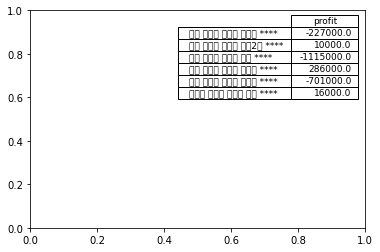

In [133]:
# from pandas.plotting import table
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(1, 1)
# table(ax, np.round(df.describe(), 2),loc='upper right', colWidths=[0.2, 0.2, 0.2])

# table(
#     ax=ax,
#     data=t_order['profit'],
#     loc='upper right',
#     colWidths=[0.2, 0.2, 0.2]
# )